In [2]:
%load_ext autoreload
%autoreload 2

import evaluation
import pandas
import os
import visualization as vis
import mir_eval
from glob import glob
import numpy as np
import datasets

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re


experiments_dir = "../experimenty/"

from common_jupyter import *

# Všechny obrázky se ukládají do `./figures/`

## Replikace CREPE

Pro ověření správnosti vlastní implementace architektury *monopitch trackeru CREPE* jsem spustil svůj model na syntetických, monofonních datech používaných v článku (*mdb-stem-synth*). Na rozdíl od článku jsem model netrénoval na všech datech pomocí postupu *5 fold cross validation*, jiné zásadní rozdíly mezi implementacemi jsem však na základě článku a veřejně dostupného kódu neidentifikoval.

Po jedné epoše trénování model dosáhl vyšší přesnosti, než je uváděná v literatuře, tento rozdíl přičítám zejména zmiňované odlišné evaluační strategii.

Metrika | Průměrná přesnost
--- | ---
Raw Pitch Accuracy             |0.986444
Raw Chroma Accuracy            |0.988044
Raw Pitch Accuracy 25 cent     |0.974920
Raw Chroma Accuracy 25 cent    |0.973362
Raw Pitch Accuracy 10 cent     |0.936620
Raw Chroma Accuracy 10 cent    |0.935243

## Vliv diskretizace výšky noty (u výstupu)

Sada experimentů srovnává přesnost modelů 

In [13]:
paths = [
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0305_161351-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0305_165012-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0305_174655-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm16-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_203237-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_211402-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0306_010342-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.25-mw1.0-cm16-mc0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0402_215823-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.0002-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm32-mc0-vsFalse-flc1/model-f0-outputs",
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0403_040012-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps1-as0.0-lr0.0002-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm32-mc0-vsFalse-flc1/model-f0-outputs",
]
attr_names = [
    "Mult. koef. kapacity"
]
attributes = [
    #[4,  1],
    #[8,  1],
    #[16, 1],
    [4],
    [8],
    [16],
    [32],
    #[32, 1],
]
data = load_data(paths, attributes, attr_names)

['Mult. koef. kapacity', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{rrr}
\toprule
Mult. koef. kapacity &   RPA &   RCA \\
\midrule
                   4 & 0.634 & 0.753 \\
                   8 & 0.661 & 0.766 \\
                  16 & 0.666 & 0.771 \\
                  32 & 0.656 & 0.753 \\
\bottomrule
\end{tabular}



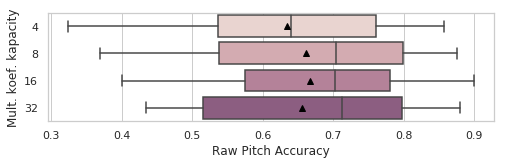

In [14]:
summary = plot_data(data, attr_names, "crepe_kapacita")
to_latex(summary)

In [4]:
paths = [
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0305_161351-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0305_165012-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_174655-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm16-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0305_203237-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0305_211402-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0306_010342-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.25-mw1.0-cm16-mc0-vsFalse-flc1/model-f0-outputs",
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0402_215823-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.0002-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm32-mc0-vsFalse-flc1/model-f0-outputs",
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0403_040012-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps1-as0.0-lr0.0002-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm32-mc0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0403_100217-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps9-as0.25-lr0.0002-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm16-mc0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0403_121056-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps7-as0.25-lr0.0002-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm16-mc0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0403_141920-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps3-as0.25-lr0.0002-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm16-mc0-vsFalse-flc1/model-f0-outputs",
    
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0305_225437-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm16-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    #experiments_dir+"crepe/FINAL/negranularni_vystup/0402_143625-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.001-lrd0.9-lrds20000.0-cg0.0-llw0.0-mw1.0-cm16-mc0-vsFalse-flc1/model-f0-outputs",

]
attr_names = [
    "Jemnost diskretizace"
]
attributes = [
    #[4,  1],
    #[8,  1],
    [1],
    #[4,  5],
    #[8,  5],
    [5],
    #[32, 5],
    #[32, 1],
    [9],
    [7],
    [3],
    #[5.1],
    #[5.2],
]
data = load_data(paths, attributes, attr_names)

['Jemnost diskretizace', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{rrr}
\toprule
Jemnost diskretizace &   RPA &   RCA \\
\midrule
                   1 & 0.612 & 0.711 \\
                   3 & 0.653 & 0.760 \\
                   5 & 0.666 & 0.771 \\
                   7 & 0.654 & 0.763 \\
                   9 & 0.658 & 0.760 \\
\bottomrule
\end{tabular}



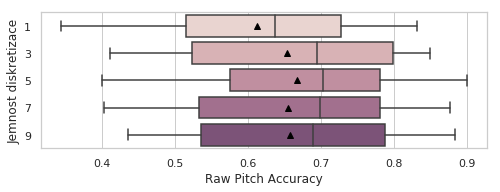

In [5]:
summary = plot_data(data, attr_names, "crepe_diskretizace")
to_latex(summary)

In [6]:
paths = [
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_161351-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_165012-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_174655-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm16-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_203237-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_211402-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0306_010342-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.25-mw1.0-cm16-mc0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0402_215823-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.0002-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm32-mc0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0403_040012-crepe-dmdb-bs32-s16000-hsNone-fw93-cw466-inTrue-apw1-mn0-nr128-bps1-as0.0-lr0.0002-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm32-mc0-vsFalse-flc1/model-f0-outputs",
]
attr_names = [
    "Mult. koef. kapacity", "Jemnost diskretizace"
]
attributes = [
    [4,  1],
    [8,  1],
    [16, 1],
    [4,  5],
    [8,  5],
    [16, 5],
    [32, 5],
    [32, 1],
]
data = load_data(paths, attributes, attr_names)

['Mult. koef. kapacity', 'Jemnost diskretizace', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{rrrr}
\toprule
Mult. koef. kapacity & Jemnost diskretizace &   RPA &   RCA \\
\midrule
                   4 &                    1 & 0.606 & 0.708 \\
                   4 &                    5 & 0.634 & 0.753 \\
                   8 &                    1 & 0.614 & 0.724 \\
                   8 &                    5 & 0.661 & 0.766 \\
                  16 &                    1 & 0.612 & 0.711 \\
                  16 &                    5 & 0.666 & 0.771 \\
                  32 &                    1 & 0.613 & 0.712 \\
                  32 &                    5 & 0.656 & 0.753 \\
\bottomrule
\end{tabular}



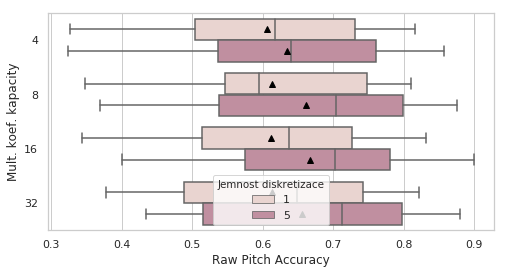

In [7]:
summary = plot_data(data, attr_names, "crepe_kapacita_diskretizace")
to_latex(summary)

In [8]:
method = "test"
est_suffix = ".csv"

def get_diffs(path):
    diffs = []
    for prefix, split, dataset_name, ref_paths, est_paths in evaluation.paths_iterator(method, path, est_suffix):
        for filename, (ref_time, ref_freq, est_time, est_freq) in evaluation.load_melody_paths(ref_paths, est_paths):
            ref_notes = datasets.common.hz_to_midi_safe(ref_freq)
            est_notes = datasets.common.hz_to_midi_safe(np.abs(est_freq))
            diff = (est_notes - ref_notes)[(ref_freq > 0) & (est_freq > 0)]
            filtered_diff = diff[np.abs(diff) > 0.5]
            diffs.append(filtered_diff)
    return diffs

diffs1 = get_diffs(paths[2])
diffs2 = get_diffs(paths[5])


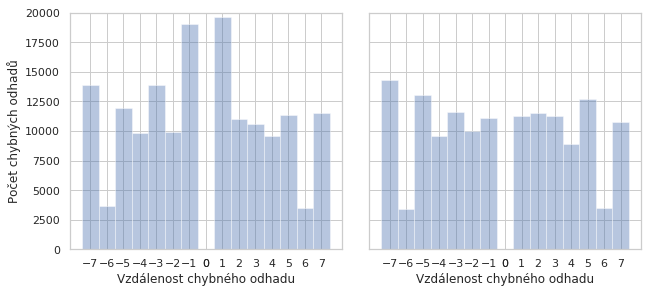

In [9]:
sns.set(rc={'figure.figsize': (9, 4)})
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
# ax = fig.add_subplot(111)

bins = np.arange(-7, 9)
midbins = bins - 0.5
bins[-1] = 0
axs[0].set_ylim(0, 20000)
axs[1].set_ylim(0, 20000)
axs[1].yaxis.set_ticklabels([])
axs[0].set_xticks(bins)
axs[1].set_xticks(bins)

plt.tight_layout()
axs[0].set_xlabel("Vzdálenost chybného odhadu")
axs[1].set_xlabel("Vzdálenost chybného odhadu")
axs[0].set_ylabel("Počet chybných odhadů")

sns.distplot(np.concatenate(diffs1), kde=False, bins=midbins, ax=axs[0])
sns.distplot(np.concatenate(diffs2), kde=False, bins=midbins, ax=axs[1])

fig.savefig("figures/crepe_diskretizace_hist.pdf", bbox_inches="tight")

## Vliv rozptylu distribuce výšky noty

In [10]:
paths = [
    experiments_dir+"crepe/FINAL/rozptyl/0311_115700-crepe-dmdb-bs32-apw1-hsNone-fw93-cw2002-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.0-mw1.0-cm16-mc6-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/rozptyl/0311_231159-crepe-smtk1-dmdb-bs32-apw1-hsNone-fw93-cw2002-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.125-mw1.0-cm16-mc6-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/rozptyl/0312_081316-crepe-smtk10-dmdb-bs32-apw1-hsNone-fw93-cw2002-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.25-mw1.0-cm16-mc6-vsFalse-flc1/model.ckpt-357190-f0-outputs",
    experiments_dir+"crepe/FINAL/rozptyl/0313_000733-crepe-rFalse-dmdb-bs32-apw1-hsNone-fw93-cw2002-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.5-mw1.0-cm16-mc6-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/rozptyl/0313_090848-crepe-rFalse-dmdb-bs32-apw1-hsNone-fw93-cw2002-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as1.0-mw1.0-cm16-mc6-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/rozptyl/0414_181622-crepe-dmdb-bs32-s16000-hsNone-fw93-cw2002-inTrue-apw1-mn0-nr128-bps5-as0.2651650429449553-lr0.001-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm16-mc6-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/rozptyl/0415_034425-crepe-dmdb-bs32-s16000-hsNone-fw93-cw2002-inTrue-apw1-mn0-nr128-bps5-as0.22097086912079608-lr0.001-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm16-mc6-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/rozptyl/0415_131120-crepe-dmdb-bs32-s16000-hsNone-fw93-cw2002-inTrue-apw1-mn0-nr128-bps5-as0.1237436867076458-lr0.001-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-cm16-mc6-vsFalse-flc1/model-f0-outputs",
]
attr_names = [r
    "Rozptyl"
]
attributes = [
    [0.0],
    [0.088],
    [0.177],
    [0.354],
    [0.707],
    [0.265],
    [0.221],
    [0.124],
]
data = load_data(paths, attributes, attr_names)

['Rozptyl', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{rrr}
\toprule
Rozptyl &   RPA &   RCA \\
\midrule
  0.000 & 0.657 & 0.759 \\
  0.088 & 0.672 & 0.775 \\
  0.124 & 0.677 & 0.773 \\
  0.177 & 0.689 & 0.784 \\
  0.221 & 0.677 & 0.771 \\
  0.265 & 0.677 & 0.770 \\
  0.354 & 0.669 & 0.773 \\
  0.707 & 0.654 & 0.757 \\
\bottomrule
\end{tabular}



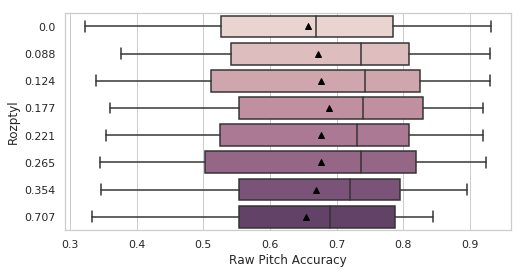

In [11]:
summary = plot_data(data, attr_names, "crepe_rozptyl")
to_latex(summary)

## Vliv šířky vstupního okna

In [12]:
paths = [
    experiments_dir+"crepe/FINAL/sirka_okna/0226_233744-crepe-dmdb,orchset-bs32-apw1-fw93-cw210-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/sirka_okna/0227_003017-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/sirka_okna/0227_013427-crepe-dmdb,orchset-bs32-apw1-fw93-cw978-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/sirka_okna/0227_025011-crepe-dmdb,orchset-bs32-apw1-fw93-cw2002-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/sirka_okna/0227_045758-crepe-dmdb,orchset-bs32-apw1-fw93-cw4050-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs"
]
attr_names = [
    "Šířka vstupního okna"
]
attributes = [
[512],
[1024],
[2048],
[4096],
[8192],
]
data = load_data(paths, attributes, attr_names)

['Šířka vstupního okna', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{rrr}
\toprule
Šířka vstupního okna &   RPA &   RCA \\
\midrule
                 512 & 0.634 & 0.748 \\
                1024 & 0.645 & 0.763 \\
                2048 & 0.648 & 0.760 \\
                4096 & 0.650 & 0.762 \\
                8192 & 0.675 & 0.775 \\
\bottomrule
\end{tabular}



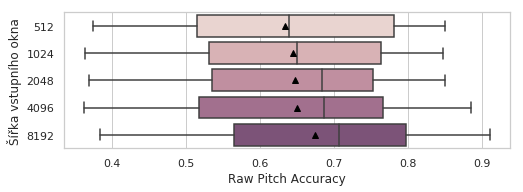

In [13]:
summary = plot_data(data, attr_names, "crepe_sirka")
to_latex(summary)

## Vliv násobného rozlišení první konvoluční vrstvy

['Počet konvolučních vrstev', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{rrr}
\toprule
Počet konvolučních vrstev &   RPA &   RCA \\
\midrule
                        1 & 0.669 & 0.779 \\
                        2 & 0.669 & 0.773 \\
                        3 & 0.672 & 0.773 \\
                        4 & 0.674 & 0.778 \\
                        5 & 0.686 & 0.781 \\
                        6 & 0.678 & 0.780 \\
                        7 & 0.677 & 0.779 \\
                        8 & 0.680 & 0.778 \\
\bottomrule
\end{tabular}



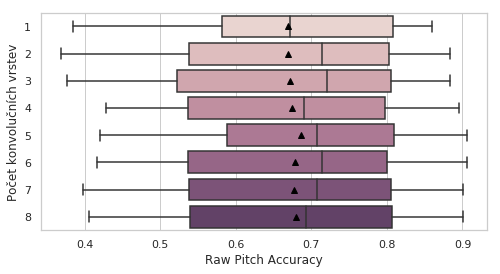

In [14]:
paths = [
experiments_dir+"crepe/FINAL/multiresolution3/0403_173920-crepe-dmdb-bs32-s16000-hsNone-fw93-cw978-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.001-lrd0.5-lrds50000-cg0.0-llw0.0-mw1.0-cm8-mc0-vsFalse-flc1/model-f0-outputs",
experiments_dir+"crepe/FINAL/multiresolution3/0403_200054-crepe-dmdb-bs32-s16000-hsNone-fw93-cw978-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.001-lrd0.5-lrds50000-cg0.0-llw0.0-mw1.0-cm8-mc2-vsFalse-flc1/model-f0-outputs",
experiments_dir+"crepe/FINAL/multiresolution3/0403_222235-crepe-dmdb-bs32-s16000-hsNone-fw93-cw978-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.001-lrd0.5-lrds50000-cg0.0-llw0.0-mw1.0-cm8-mc3-vsFalse-flc1/model-f0-outputs",
experiments_dir+"crepe/FINAL/multiresolution3/0404_005027-crepe-dmdb-bs32-s16000-hsNone-fw93-cw978-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.001-lrd0.5-lrds50000-cg0.0-llw0.0-mw1.0-cm8-mc4-vsFalse-flc1/model-f0-outputs",
experiments_dir+"crepe/FINAL/multiresolution3/0404_031245-crepe-dmdb-bs32-s16000-hsNone-fw93-cw978-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.001-lrd0.5-lrds50000-cg0.0-llw0.0-mw1.0-cm8-mc5-vsFalse-flc1/model-f0-outputs",
experiments_dir+"crepe/FINAL/multiresolution3/0404_053904-crepe-dmdb-bs32-s16000-hsNone-fw93-cw978-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.001-lrd0.5-lrds50000-cg0.0-llw0.0-mw1.0-cm8-mc6-vsFalse-flc1/model-f0-outputs",
experiments_dir+"crepe/FINAL/multiresolution3/0404_080700-crepe-dmdb-bs32-s16000-hsNone-fw93-cw978-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.001-lrd0.5-lrds50000-cg0.0-llw0.0-mw1.0-cm8-mc7-vsFalse-flc1/model-f0-outputs",
experiments_dir+"crepe/FINAL/multiresolution3/0404_103602-crepe-dmdb-bs32-s16000-hsNone-fw93-cw978-inTrue-apw1-mn0-nr128-bps5-as0.25-lr0.001-lrd0.5-lrds50000-cg0.0-llw0.0-mw1.0-cm8-mc8-vsFalse-flc1/model-f0-outputs",

]
attr_names = [
    "Počet konvolučních vrstev"
]
attributes = [
[1],
[2],
[3],
[4],
[5],
[6],
[7],
[8],
]
data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "crepe_multirozliseni")
to_latex(summary)

# ===WAVENET===

INFO:tensorflow:No path found after models/0502_114805-wavenet-bs20-fw160-cw2100-apw5-mn0-nr128-bps1-as0.0-lrd0.8-lrds10000-ifw2-ifpsame-fw2-ubTrue-sc128-rc128-sn2-md512-dld0.0-sld0.0-sadd-pconv_f128_k1_s1_Psame_arelu--conv_f128_k1_s1_Psame--avgpool_p160_s160_Psame/events.out.tfevents.1556790491.mamut


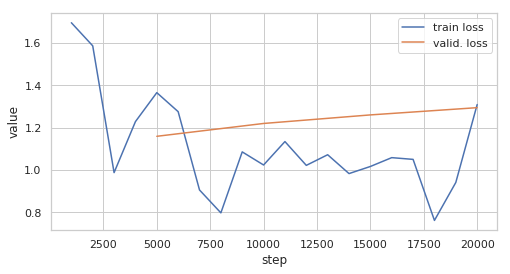

In [58]:
import pandas as pd
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

logdir = "models/0502_114805-wavenet-bs20-fw160-cw2100-apw5-mn0-nr128-bps1-as0.0-lrd0.8-lrds10000-ifw2-ifpsame-fw2-ubTrue-sc128-rc128-sn2-md512-dld0.0-sld0.0-sadd-pconv_f128_k1_s1_Psame_arelu--conv_f128_k1_s1_Psame--avgpool_p160_s160_Psame"

event_acc = EventAccumulator(logdir)
event_acc.Reload()
# print(event_acc.Tags()["scalars"])
# print(event_acc.Scalars("metrics/train/loss"))
train = pd.DataFrame(event_acc.Scalars("metrics/train/loss"))
valid = pd.DataFrame(event_acc.Scalars("valid_mdb/loss"))


sns.set(rc={'figure.figsize': (8, 4)})
sns.set(style="whitegrid")
fig, axs = plt.subplots()

sns.lineplot(x="step", y="value", data=train, label="train loss")
sns.lineplot(x="step", y="value", data=valid, label="valid. loss")
fig.savefig("figures/wavenet_overfit.pdf", bbox_inches="tight")

In [31]:
wavenet = sorted(glob("models-wavenet-FINAL/*/*/model-f0-outputs"))
list(enumerate(wavenet))

[(0,
  'models-wavenet-FINAL/dilat_skip_filtry/0428_232942-wavenet-fw160-cw8192-apw5-lrd0.8-lrds10000-ifw0-ifpsame-fw3-ubTrue-sc4-rc4-sn1-md512-dld0.0-sld0.0-slast-pavgpool_p5_s5_Psame--conv_f180_k16_s4_Psame_arelu--conv_f360_k64_s8_Psame/model-f0-outputs'),
 (1,
  'models-wavenet-FINAL/dilat_skip_filtry/0429_000500-wavenet-fw160-cw8192-apw5-lrd0.8-lrds10000-ifw0-ifpsame-fw3-ubTrue-sc8-rc8-sn1-md512-dld0.0-sld0.0-slast-pavgpool_p5_s5_Psame--conv_f180_k16_s4_Psame_arelu--conv_f360_k64_s8_Psame/model-f0-outputs'),
 (2,
  'models-wavenet-FINAL/dilat_skip_filtry/0429_005318-wavenet-fw160-cw8192-apw5-lrd0.8-lrds10000-ifw0-ifpsame-fw3-ubTrue-sc16-rc16-sn1-md512-dld0.0-sld0.0-slast-pavgpool_p5_s5_Psame--conv_f180_k16_s4_Psame_arelu--conv_f360_k64_s8_Psame/model-f0-outputs'),
 (3,
  'models-wavenet-FINAL/dilat_skip_filtry/0429_015252-wavenet-fw160-cw8192-apw5-lrd0.8-lrds10000-ifw0-ifpsame-fw3-ubTrue-sc24-rc24-sn1-md512-dld0.0-sld0.0-slast-pavgpool_p5_s5_Psame--conv_f180_k16_s4_Psame_arelu--con

['Počet kanálů', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{rrr}
\toprule
Počet kanálů &   RPA &   RCA \\
\midrule
           4 & 0.609 & 0.714 \\
           8 & 0.628 & 0.739 \\
          16 & 0.655 & 0.759 \\
          24 & 0.665 & 0.764 \\
          32 & 0.671 & 0.771 \\
          40 & 0.667 & 0.766 \\
          48 & 0.667 & 0.764 \\
\bottomrule
\end{tabular}



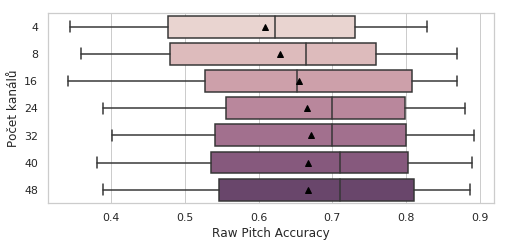

In [8]:
# skip+dilat channels
paths = filter(lambda x: "/dilat_skip_filtry/" in x, wavenet)

attr_names = [
    "Počet kanálů"
]
attributes = [
    [4],
    [8],
    [16],
    [24],
    [32],
    [40],
    [48],
]
data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "wavenet_dil_skip_channels")
to_latex(summary)

In [12]:
paths = filter(lambda x: "/gridsearch_stacks_layers/" in x, wavenet)

attr_names = [
    "Počet bloků", "Max. dilatace"
]
attributes = [
[1, 64],
[2, 64],
[3, 64],
[4, 64],
[1, 128],
[2, 128],
[3, 128],
[4, 128],
[1, 256],
[2, 256],
[3, 256],
[4, 256],
[1, 512],
[2, 512],
[3, 512],
[4, 512],
[1, 1024],
[2, 1024],
[3, 1024],
[1, 2048],
# [4, 1024],
]
# print("\n".join(map(str, list(zip(paths, attributes)))))

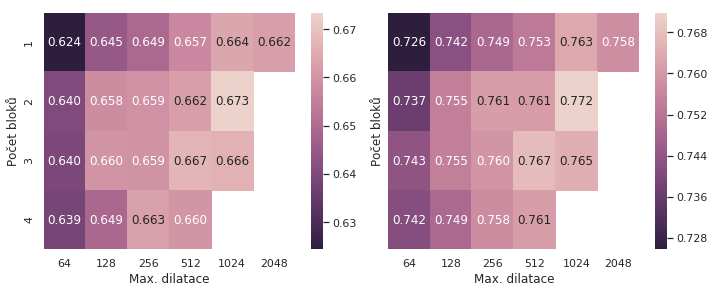

In [13]:
sns.set(rc={'figure.figsize': (10, 4)})
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True)
axs[1].set_ylabel("")
plt.tight_layout()

data = load_data(paths, attributes, attr_names)
cmap = sns.cubehelix_palette(100, reverse=True, as_cmap=True)

pivot = data[data.Dataset=="MedleyDB valid."].groupby(attr_names).mean().reset_index().pivot(attr_names[0], attr_names[1], "Raw Pitch Accuracy")
sns.heatmap(pivot,annot=True, fmt=".3f", cmap=cmap, ax=axs[0])

pivot = data[data.Dataset=="MedleyDB valid."].groupby(attr_names).mean().reset_index().pivot(attr_names[0], attr_names[1], "Raw Chroma Accuracy")
sns.heatmap(pivot,annot=True, fmt=".3f", cmap=cmap, ax=axs[1])

fig.savefig("figures/wavenet_stacks_gridsearch.pdf", bbox_inches="tight")

## Vliv velikosti šířky kernelu dilatací

['Šířka kernelu dilatací', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{rrr}
\toprule
Šířka kernelu dilatací &   RPA &   RCA \\
\midrule
                     2 & 0.649 & 0.754 \\
                     3 & 0.648 & 0.755 \\
                     4 & 0.656 & 0.759 \\
                     5 & 0.645 & 0.756 \\
\bottomrule
\end{tabular}



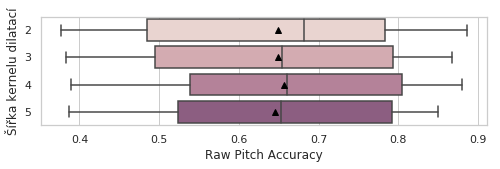

In [14]:
paths = filter(lambda x: "/filter_width/" in x, wavenet)

attr_names = [
    "Šířka kernelu dilatací"
]
attributes = [
[2],
[3],
[4],
[5],
]
data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "wavenet_dilation_width")
to_latex(summary)

['Transf. skip vrstev', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{lrr}
\toprule
Transf. skip vrstev &   RPA &   RCA \\
\midrule
        Konkatenace & 0.654 & 0.754 \\
           Poslední & 0.651 & 0.754 \\
             Součet & 0.646 & 0.753 \\
\bottomrule
\end{tabular}



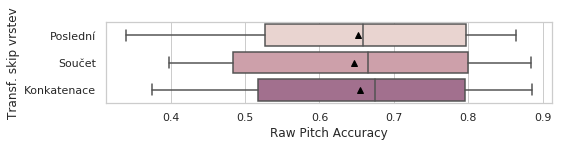

In [16]:
paths = filter(lambda x: "/skip_transform/" in x, wavenet)

attr_names = [
    "Transf. skip vrstev"
]
attributes = [
["Poslední"],
["Součet"],
["Konkatenace"],
]
data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "wavenet_skip_reduction")
to_latex(summary)

['Velikost první vrstvy', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy']
\begin{tabular}{rrr}
\toprule
Velikost první vrstvy &   RPA &   RCA \\
\midrule
                    0 & 0.648 & 0.755 \\
                    8 & 0.663 & 0.762 \\
                   16 & 0.661 & 0.765 \\
                   32 & 0.654 & 0.754 \\
                   64 & 0.643 & 0.756 \\
                  256 & 0.609 & 0.735 \\
                 1024 & 0.601 & 0.734 \\
\bottomrule
\end{tabular}



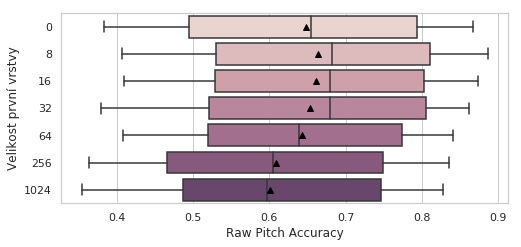

In [21]:
paths = list(filter(lambda x: "0501_232325-wavenet" in x, wavenet))+list(filter(lambda x: "/sirka_prvni_konv/" in x, wavenet))
# print("\n".join(paths))

attr_names = [
    "Velikost první vrstvy"
]
attributes = [
[0],
[16],
[64],
[256],
[1024],
[8],
[32],
]
data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "wavenet_first_layer")
to_latex(summary)

,Raw Pitch Accuracy,Raw Chroma Accuracy
Architektura,,
conv_f360_k320_s160,0.629693,0.738009
avgpool_p5_s5--conv_f360_k256_s32,0.635990,0.745412
conv_f360_k160_s160,0.636658,0.743806
conv_f360_k80_s160,0.642692,0.744423
avgpool_p5_s5--conv_f360_k64_s32,0.643570,0.748321
avgpool_p5_s5--conv_f360_k128_s32,0.643748,0.749359
avgpool_p160_s160--conv_f360_k1_s1,0.644494,0.743710
avgpool_p10_s10--conv_f360_k64_s16,0.646275,0.750220
avgpool_p5_s5--conv_f360_k32_s32,0.649511,0.748593


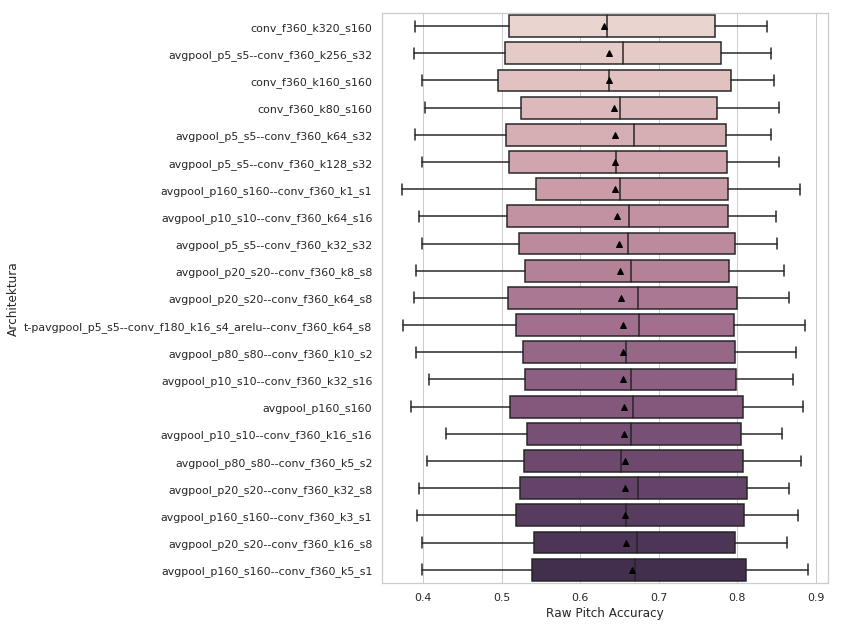

In [35]:
# paths = wavenet[38:]+[wavenet[19]]
paths = list(filter(lambda x: "/last_layers/" in x, wavenet))+list(filter(lambda x: "0502_042854" in x, wavenet))
#print("\n".join(paths))

attr_names = [
    "Architektura"
]
attributes = [[x[155:-17].replace("_Psame","")] for x in paths]

data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "wavenet_output_transform", order=True)
summary
#to_latex(summary)